# > qdef - Documentation

In [1]:
# provide cell timings
%load_ext autotime
from qdef import qdef as qd
import sympy as sp
import numpy as np
from itertools import product
%config InlineBackend.figure_format = 'retina'
from IPython.display import display, Math
import matplotlib.pyplot as plt

Reloading /Users/juan/ZiaLab/Codebase/qdef/qdef/data/CPGs.pkl ...


# > Classes

## >> Qet

### >>> Creation

qets can be defined by a dictionary whose keys are interpreted as quantum symbols (qsymbs) and whose values are the accompanying coefficients

In [2]:
qet1 = qd.Qet({sp.Symbol('α'):sp.S(1)/sp.sqrt(2),
              sp.Symbol('β'):-sp.S(1)/sp.sqrt(2)})
display(qet1.as_ket())

sqrt(2)*|α>/2 - sqrt(2)*|β>/2

The quantum symbols can be any hashable object (tuples, frozensets, etc.)

In [3]:
qet2 = qd.Qet({(sp.Symbol('α'),1):sp.S(1)/sp.sqrt(2),
              (sp.Symbol('β'),2):-sp.S(1)/sp.sqrt(2)})
display(qet2.as_ket())

sqrt(2)*|(α, 1)>/2 - sqrt(2)*|(β, 2)>/2

A blank qet can be created thus.

In [4]:
qet = qd.Qet({})
display(qet)
qet = qet + qd.Qet({1:1})
display(qet.as_ket())

Qet({})

|1>

### >>> Addition, subtraction, and scalar multiplication

qets can be added or subtracted

In [5]:
qet3 = qd.Qet({(sp.Symbol('α'),1):sp.S(1)/sp.sqrt(2),
              (sp.Symbol('β'),2):-sp.S(1)/sp.sqrt(2)})
qet4 = qd.Qet({(sp.Symbol('α'),1):sp.S(1)/sp.sqrt(2),
              (sp.Symbol('β'),2):sp.S(1)/sp.sqrt(2)})
qet34 = qet3 + qet4
display(qet34.as_ket())
qet34 = qet3 - qet4
display(qet34.as_ket())

sqrt(2)*|(α, 1)>

-sqrt(2)*|(β, 2)>

Scalar multiplication is simple, too.

In [6]:
qet1 = qd.Qet({sp.Symbol('α'):sp.S(1)/sp.sqrt(2),
              sp.Symbol('β'):-sp.S(1)/sp.sqrt(2)})
qet1 = sp.pi * qet1
display(qet1.as_ket())

sqrt(2)*pi*|α>/2 - sqrt(2)*pi*|β>/2

Division by a scalar has to be expressed as a multiplication.

In [7]:
# this throws an error
# qet1 = qd.Qet({sp.Symbol('α'):sp.S(1)/sp.sqrt(2),
#               sp.Symbol('β'):-sp.S(1)/sp.sqrt(2)})
# qet1 = qet1 / sp.pi
# display(qet1.as_ket())

In [8]:
# this does work
qet1 = qd.Qet({sp.Symbol('α'):sp.S(1)/sp.sqrt(2),
              sp.Symbol('β'):-sp.S(1)/sp.sqrt(2)})
qet1 = 1/sp.pi * qet1
display(qet1.as_ket())

sqrt(2)*|α>/(2*pi) - sqrt(2)*|β>/(2*pi)

### >>> Replacements and simplification

It might be necessary to make a replacement on the quantum symbols or on the coefficients.

In [9]:
# substitutions can be made on quantum symbols (keys) that are sympy expressions
qet1 = qd.Qet({sp.Symbol('\\alpha'):sp.S(1)/sp.sqrt(2)})
display(qet1.as_ket())
qet2 = qet1.keysubs({sp.Symbol('\\alpha'): sp.Symbol('\\beta')})
display(qet2.as_ket())

sqrt(2)*|\alpha>/2

sqrt(2)*|\beta>/2

In [10]:
# they can also be made on tuples of sympy expressions
qet1 = qd.Qet({(sp.Symbol('\\alpha'),sp.Symbol('\\beta')):sp.S(1)/sp.sqrt(2)})
display(qet1.as_ket())
qet2 = qet1.keysubs({sp.Symbol('\\alpha'): sp.Symbol('\\iota'),
                     sp.Symbol('\\beta'): sp.Symbol('\\zeta')})
display(qet2.as_ket())

sqrt(2)*|(\alpha, \beta)>/2

sqrt(2)*|(\iota, \zeta)>/2

In [11]:
# substitutions can also be enforced on the coefficients of the qet
qet1 = qd.Qet({sp.Symbol('\\alpha'):sp.cos(sp.Symbol('\\theta')),
               sp.Symbol('\\beta'):sp.sin(sp.Symbol('\\theta'))})
display(qet1.as_ket())
qet1 = qet.valsubs({sp.Symbol('\\theta'): sp.pi/2})
display(qet1.as_ket())

sin(\theta)*|\beta> + cos(\theta)*|\alpha>

|1>

It is also possible to apply sympy's simplifcation to the coefficients of a qet:

In [12]:
θ = sp.Symbol('\\theta', real=True)
qeta = qd.Qet({sp.Symbol('\\beta'): sp.cos(θ)**2})
qetb = qd.Qet({sp.Symbol('\\beta'): sp.sin(θ)**2})
qetab = qeta + qetb
display(qetab.as_ket())
qetab = qetab.simplify()
display(qetab.as_ket())

(sin(\theta)**2 + cos(\theta)**2)*|\beta>

|\beta>

### >>> Bra from qet

If the qet is interpreted as a ket, then the corresponding bra may be formed:

In [13]:
qeta = qd.Qet({sp.Symbol('\\beta'): sp.cos(θ)})
qetb = qd.Qet({sp.Symbol('\\gamma'): sp.I * sp.sin(θ)})
qetab = qeta + qetb
display(qetab.as_ket())
bra = qetab.dual()
display(bra.as_bra())

I*sin(\theta)*|\gamma> + cos(\theta)*|\beta>

-I*sin(\theta)*<\gamma| + cos(\theta)*<\beta|

This simply keeps the same quantum symbols and takes the complex conjugate of the coefficients. As seen above there's also a method for visualizing these objects in the standard quantum mechanical notation.

### >>> Operator

A Qet may also be visualized as if it were an operator.

In [14]:
op = qd.Qet({(sp.Symbol('\\hat{a}'),):1/sp.sqrt(2)}) + qd.Qet({(sp.Symbol('\\hat{b}'),):1/sp.sqrt(2)})
op.as_operator(lambda x: x)

sqrt(2)*\hat{a}/2 + sqrt(2)*\hat{b}/2

### >>> Represent as a determinantal ket or bra

A Qet may be displayed in determinantal ket notation. It assumes that the quantum symbols are encapsulated in tuples.

In [15]:
qeta = qd.Qet({(sp.Symbol('\\beta'),) : sp.cos(θ)})
qetb = qd.Qet({(sp.Symbol('\\gamma'),): sp.sin(θ)})
qetab = qeta + qetb
display(qetab.as_detket())

sin(\theta)*|\gamma> + cos(\theta)*|\beta>

In [16]:
qeta = qd.Qet({(sp.Symbol('\\beta'),) : sp.cos(θ)})
qetb = qd.Qet({(sp.Symbol('\\gamma'),): sp.sin(θ)})
qetab = qeta + qetb
display(qetab.as_detbra())

sin(\theta)*|\gamma> + cos(\theta)*|\beta>

### >>> Often times it might be useful to find the coefficients of a qet in a given ordered basis

By default a Qet is unordered, putting down the coefficients in an ordered basis gives it a specific ordering.

In [17]:
basis = list(product([0,1],[0,1]))
qet_dict = {}
for idx, basis_vect in enumerate(basis):
    qet_dict[basis_vect] = idx + 1
qet = qd.Qet(qet_dict)
display(qet.as_ket())
print(qet.vec_in_basis(basis))

|(0, 0)> + 2*|(0, 1)> + 3*|(1, 0)> + 4*|(1, 1)>

[1, 2, 3, 4]


In dealing with bases composed of Slater determinants it might be necessary to make permutations in order to identify the coefficients of a given qet.
For this the method `.vec_in_detbasis` can be used.

In [18]:
# in this example swapping the slots 1 and 0 match the given qet to the basis, as such
# its coefficient is multiplied by -1
basis = [(0,1), (2,1)]
qet_dict = {(1,0):1, (2,1):1}
qet = qd.Qet(qet_dict)
display(qet.as_detket())
print(qet.vec_in_detbasis(basis))

|10> + |21>

[-1, 1]


### >>> Represent as a braket

A Qet may also be interpreted as a braket. The method below can be used to visualize it. It assumes that the first half of the quantum symbols belong to the bra, and the second half those of the ket.

In [19]:
braket = (qd.Qet({(sp.Symbol('\\beta'),('\\gamma')) : sp.cos(θ)}) +
    qd.Qet({(sp.Symbol('\\iota'),('\\gamma')) : sp.cos(θ)}) 
        )
display(braket.as_braket())

cos(\theta)*<\beta|\gamma> + cos(\theta)*<\iota|\gamma>

### >>> apply

A function may be applied to a Qet. The function must take a single pair (qnums, coeff) and return a dictionary or a (qnum, coeff) tuple.

In [20]:
qet1 = qd.Qet({sp.Symbol('α'):sp.S(1)/sp.sqrt(2),
              sp.Symbol('β'):-sp.S(1)/sp.sqrt(2)})
display(qet1.as_ket())
def qfun(qnums, coeff):
    if qnums == sp.Symbol('α'):
        multiplier = -1
    else:
        multiplier = 1
    return (qnums, multiplier * coeff)
qet1.apply(qfun).as_ket()

sqrt(2)*|α>/2 - sqrt(2)*|β>/2

-sqrt(2)*|α>/2 - sqrt(2)*|β>/2

In [21]:
qet1 = qd.Qet({(1,-1):sp.S(1)/sp.sqrt(2),
              (2,3):-sp.S(1)/sp.sqrt(2)})
display(qet1.as_ket())
def qfun(qnums, coeff):
    multiplier = sum(qnums)
    return (qnums, multiplier * coeff)
qet1.apply(qfun).as_ket()

sqrt(2)*|(1, -1)>/2 - sqrt(2)*|(2, 3)>/2

-5*sqrt(2)*|(2, 3)>/2

### >>> as_symbol_sum

If the quantum symbols are a single sp.Symbol, .as_symbol_sum can be used to create a symbolic expression for the qet.

In [22]:
qet1 = qd.Qet({sp.Symbol('\\gamma'):sp.S(1)/sp.sqrt(2),
               sp.Symbol('\\eta'):-sp.S(1)/sp.sqrt(2)})
display(qet1.as_symbol_sum())

-sqrt(2)*\eta/2 + sqrt(2)*\gamma/2

### >>> norm

Compute the norm, or normalize a given qet.

In [23]:
qet1 = qd.Qet({-qd.HALF:sp.S(1)/sp.sqrt(2),
               qd.HALF:-sp.S(1)/sp.sqrt(2)})
display(qet1.norm())

1

In [24]:
qet1 = qd.Qet({-qd.HALF:sp.S(1)/sp.sqrt(3),
               qd.HALF:-sp.S(1)/sp.sqrt(2)})
display(qet1.norm())
display(qet1.normalized().norm())

sqrt(30)/6

1

### >>> permute

To shuffle the symbols inside of the keys to a Qet, one may apply a permutation. A permutation is given as a list of indices to which the original order is mapped to.

In [25]:
qet2 = qd.Qet({(sp.Symbol('α'),1):sp.S(1)/sp.sqrt(2),
              (sp.Symbol('β'),2):-sp.S(1)/sp.sqrt(2)})
display(qet2.as_ket())
permutation = [1,0]
display(qet2.permute(permutation).as_ket())

sqrt(2)*|(α, 1)>/2 - sqrt(2)*|(β, 2)>/2

sqrt(2)*|(1, α)>/2 - sqrt(2)*|(2, β)>/2

In [26]:
qet2 = qd.Qet({(sp.Symbol('α'),1,0):sp.S(1)/sp.sqrt(2),
              (sp.Symbol('β'),2,6):-sp.S(1)/sp.sqrt(2)})
display(qet2.as_ket())
permutation = [1,0,2]
display(qet2.permute(permutation).as_ket())

sqrt(2)*|(α, 1, 0)>/2 - sqrt(2)*|(β, 2, 6)>/2

sqrt(2)*|(1, α, 0)>/2 - sqrt(2)*|(2, β, 6)>/2

## >> Atom & Ion

+ Given as a class `Atom`, it can be instantiated with atomic number of element symbol to provide a number of physical data that can be accessed with the following attributes:
    + `symbol`,
    + `ionization_energies`, (list)
    + `nist_data_levels`: (pd.Dataframe)
    + `nist_data_lines`: (pd.Dataframe)
    + `isotope_data`: (pd.Dataframe)
    + `electronegativity`: (float)
    + `electron_configuration`: (dict)
    + `common_crystal structure`: (str)
    + `atomic_radius`: (float)
    + `covalent_radius`: (float)
    + `period`: (str) in which it is in the periodic table
    + `series`: (str) that it belongs to in the periodict table,
    + `group`: (str) such that it has in the periodic table
* In addition to these, the method `level_diagram` can be used to quickly get an overview of the level for the given atom for a given charge state.
***
+ The class `Ion` inherits from `Atom` but to it one may also give the charge state of the atom.

An Atom can be instantiated with its atomic number or its symbol

In [27]:
europium = qd.Atom('Eu')
europium = qd.Atom(63)

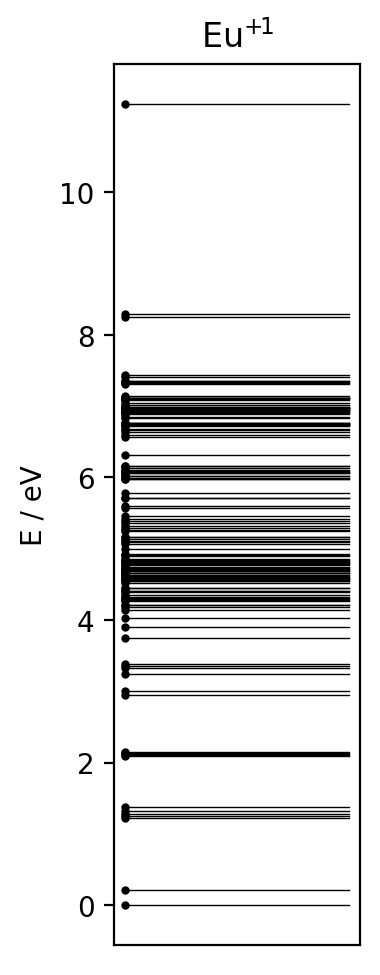

In [28]:
europium.level_diagram(1)

An Ion can be instantiated with its atomic number or its symbol, and its corresponding charge state.

In [29]:
trichrome = qd.Ion('Cr',3)

In [30]:
'Cr^{3+} has an ionic radius of %.1f pm.' % trichrome.ionic_radius()

'Cr^{3+} has an ionic radius of 75.5 pm.'

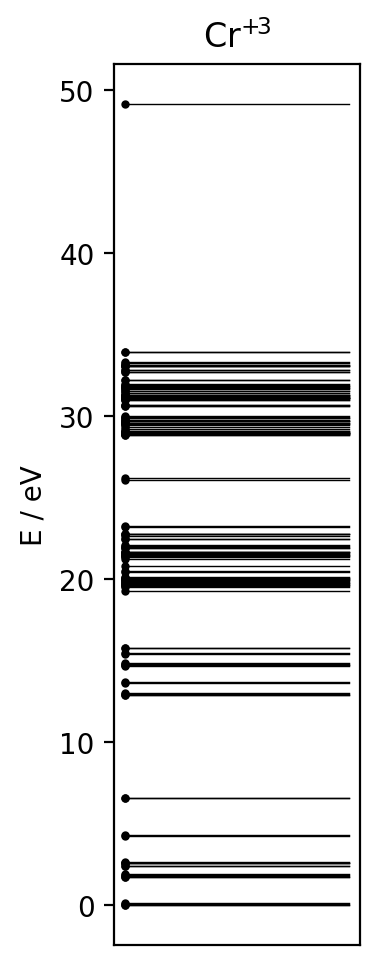

In [31]:
trichrome.level_diagram()

## >> PeriodicTable

+ This class encapsulates all the elements (as qd.Atom objects), and provides a method `.annotated_ptable` to draw a periodic table with given annotations. The atoms are stored in the `.atoms` atribute, which provides a dictionary whose keys are the corresponding atomic numbers.

In [32]:
ptable = qd.PeriodicTable()
ptable.atoms[2].atomic_radius

31.0

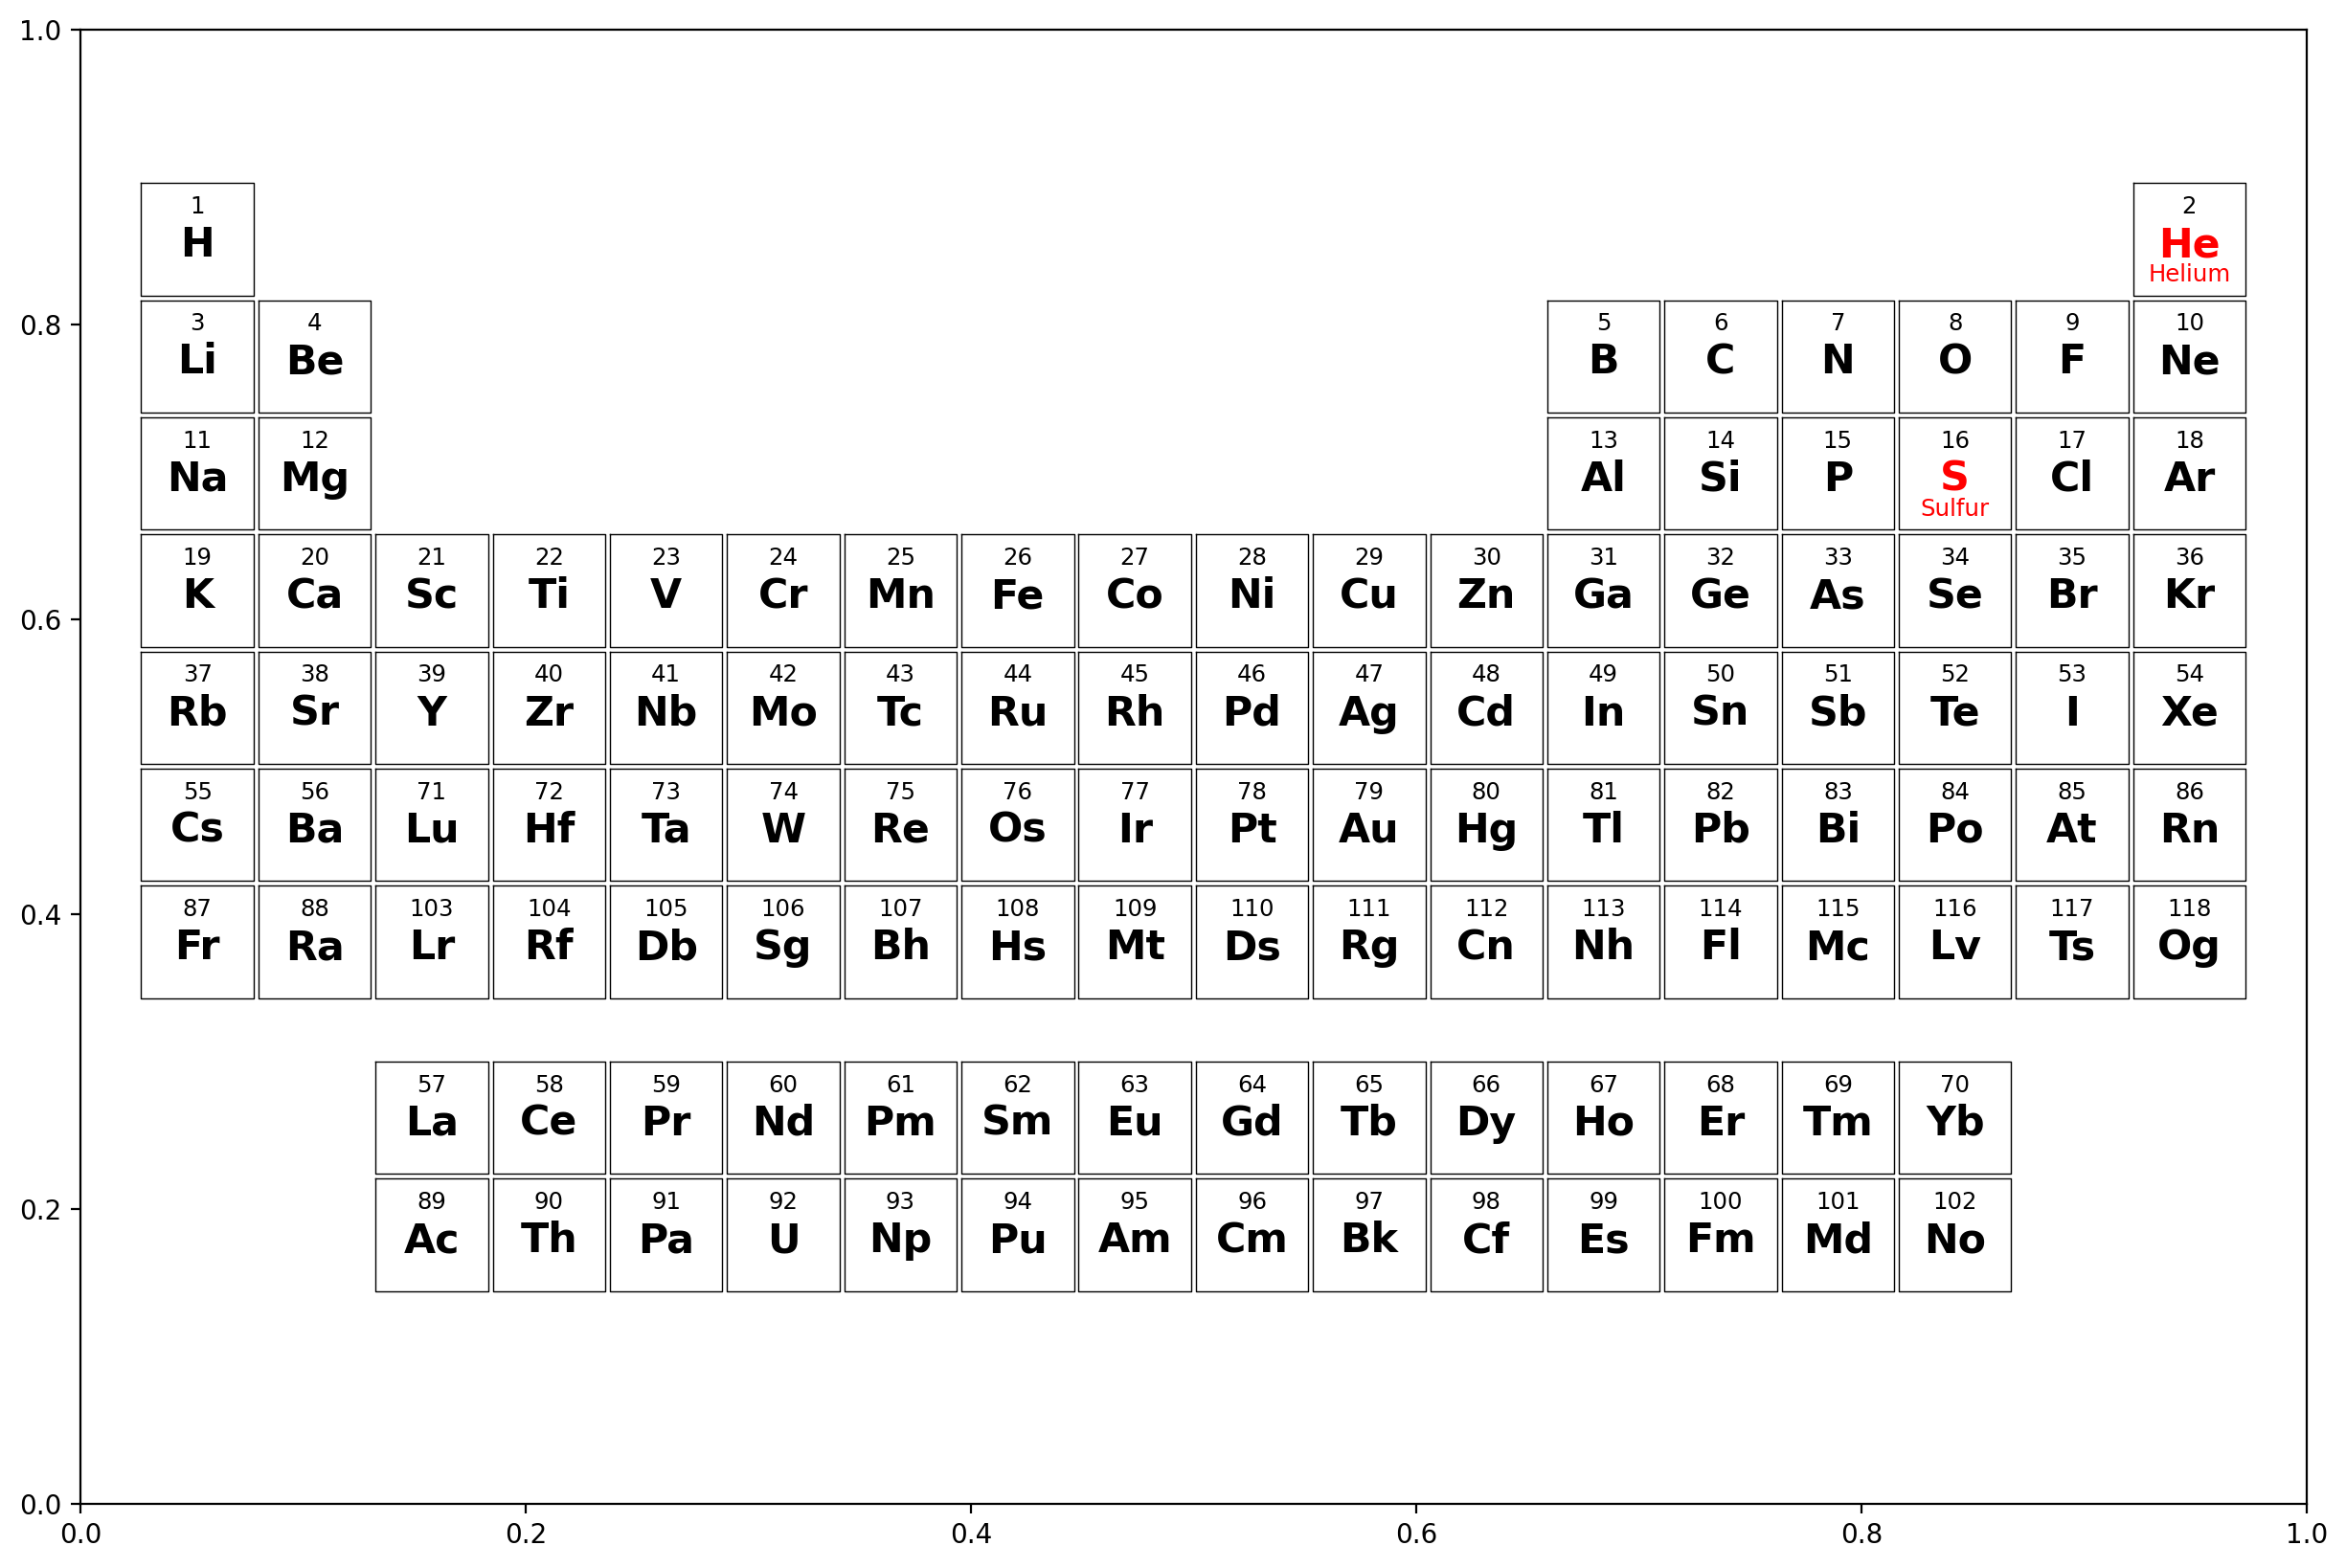

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
fig, ax = ptable.annotated_ptable(fig,{'S':'Sulfur','He':'Helium'}, 'black')
plt.show()

## >> SpinOrbital

The class `SpinOrbital` puts together the spin and orbital parts of the wavefunction.

In [34]:
sorb = qd.SpinOrbital(sp.Symbol('\\beta'), qd.S_DOWN)

In [35]:
sorb.spin, sorb.orbital

(-1/2, \beta)

In the case of a multi-electron wave function the orbital part and the spin part may be represented  by tuples.
For example, in the event one had a wavefunction for two d electrons, one of them with ml = -2, the other with ml = 2, and the spin of the first one pointing up, and the spin of the second one pointing up, one may represent this as:

In [36]:
multi_sorb = qd.SpinOrbital((-2,2), (qd.HALF, -qd.HALF))
multi_sorb

(-2, 2)↑

## >> Term

This class can be used to store a series of states that form a spectroscopic term.

In [37]:
from collections import namedtuple
Ψ = namedtuple('Ψ',['electrons','terms','γ','S','M']) 

In [38]:
states = {(sp.Symbol('E'), sp.Symbol('T_2'), sp.Symbol('A_1'), sp.Symbol('\\zeta'), 1, -1): qd.Qet({(1, qd.HALF):1}),
          (sp.Symbol('E'), sp.Symbol('E'), sp.Symbol('E'), sp.Symbol('\\eta'), 1, -1): qd.Qet({(2, qd.HALF):1})}
states = {'states': list(states.values()),
         'state_keys': list(states.keys()),
         'S': 1,
         'irrep': sp.Symbol('T_2')}
term = qd.Term(states)
display(term.term_symbol())
for ts in term.make_state_symbols():
    display(Math(ts[0]))
    display(Math(ts[1]))

{}^{3}T_{2}

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# > Physical Data

***

+ `name_to_symb` : (dict) (element name (lower case) -> element symbol)
+ `name_to_num`  : (dict) (element name (lower case) -> Z)
+ `symb_to_name` : (dict) (element symbol -> element name)
+ `symb_to_num`:   (dict) (element symbol -> Z)
+ `num_to_name`:   (dict) (Z -> element name)
+ `num_to_symb`:   (dict) (Z -> element symbol)

***

+ `atomicGoodies`: (dict)
    + **Block**: (dict) block of the periodic table (Z -> s,p,d,f)
	+ **CAS number**: (dict) Chemical Abstracts Service number (Z -> CAS number) 
	+ **Crystal Structure**: (dict) predominant crystal structure (Z -> crystal structure)
	+ **Electrical Type**: (dict) (Z -> {conductor, semicondutor, or insulator})
	+ **Electron Config**: (dict) (Z -> {'config': occupation}) 
	+ **Electron Config String**: (dict) (Z -> electron config of ground state)
	+ **Electronegativity**: (dict) (Z -> electronegativity)
	+ **Period**: (dict) (Z -> row in periodic table)
	+ **Mass Magnetic Susceptibility**: (dict) (Z -> mass magnetic susceptibility)
	+ **Memberships**: (dict) (Z -> (list)[categories to which element belongs to.])
	+ **Series**: (dict) (Z -> series to which the element belongs to)
	+ **Van der Waals radius**: (dict) (Z -> vdw radius in pm)
	+ **Atomic Mass**: (dict) (Z -> atomic mass in amu)
	+ **Atomic Radius**: (dict) (Z -> atomic radius in pm) 
	+ **Covalent Radius**: (dict) (Z -> covalent in pm)
	+ **Neutron Cross Section**:  (dict) (Z -> cross section / barns)
	+ **Universe Abundance**: (dict) (Z -> estimated mass fraction of element)
	+ **Group** (dict) (Z -> column of periodic table)
	
***

+ `ionization_data`: (dict) (element name -> (list)[ionization energies in eV given from ionization stage to ionization stage, i.e. the i-th element of the list is the energy needed to go from the previous ionization stage to the next one])
+ `atom_symbs`: (list) (element symbols), ordered according to Z.
+ `atom_names`: (list) (element names), ordered according to Z.
+ `nistdf_levels`: (pd.Dataframe) level data from the NIST spectroscopy databases.

***

+ `nistdf_lines`: (pd.Dataframe) lines data from the NIST spectroscopy databases.
+ `spinData`: (pd.Dataframe) spin of ground state of elements and their different isotopes, also includes nuclear Landé g factors, whether the element is considered radioactive, electric quadrupole moments, and natural abundances.
+ `element_groups`: (dict) for a given key ("transition metals", "lanthanides", or "actinides") this dictionary provides lists with the atomic numbers that belong to the given group. In the case of "transition metals" a second key is needed which is equal to the period number.
+ `ionic_radii`: (pd.Dataframe) ionic radii taken from Shannon, Robert D. “Revised Effective Ionic Radii and Systematic Studies of Interatomic Distances in Halides and Chalcogenides.” Acta Crystallographica Section A: Crystal Physics, Diffraction, Theoretical and General Crystallography 32, no. 5 (1976): 751–67.

NOTE: some of these constants are used in classes that aggregate some of these in useful bundles.

# > Group Theory Data

***
+ `group_dict` (dict) data for the single-valued crystallographic point groups (two keys)
    + **metadata**: explanation of data contained in the second key.
    + **group_data**: (dict) (index for crystalloraphic point groups -> dict with keys given below:
        + index, notation, group label, irrep labels, class labels, irrep matrices, classes, generators, character table, multiplication table, euler angles, group operations
***
+ `double_group_dict` (dict) data for the double-valued crystallographic point groups (two keys)
    + **metadata**: explanation of data contained in the second key.
    + **group_data**: (dict) (index for crystalloraphic point groups -> dict with keys given below:
        + index, notation, group label, irrep labels, class labels, classes, character table, multiplication table, euler angles, group operations
***

In [39]:
list(qd.group_dict.keys())

['metadata', 'group_data']

In [40]:
list(qd.group_dict['group_data'][1].keys())

['index',
 'notation',
 'group label',
 'irrep labels',
 'class labels',
 'irrep matrices',
 'classes',
 'generators',
 'character table',
 'multiplication table',
 'euler angles',
 'group operations']

# > Hartree Fock Data

+ Provided as a class, `HartreeFockData` can be instantiated to provide radial averages ($\langle{r^2}\rangle$, $\langle{r^4}\rangle$, $\langle{r^6}\rangle$) and atom sizes as calculated within the Hartree Fock approximations. This data was digitized from the Handbook of Atomic Data by Fraga et al.

In [41]:
hfData = qd.HartreeFockData()

In [42]:
print(hfData.radial_average.__doc__)


        Returns  the radial average <r^n> for a valence electron for
        the  given element and charge state (n=0 neutral, n=1 singly
        ionized, ...) within the limitations of Hartree-Fock.

        The  element  can be given either as its atomic number or by
        its symbol.

        Data is taken from Fraga's et al Handbook of Atomic Data.

        The unit for the provided radial average is Angstrom^n.

        Provided data has 5 significant figures.
        


In [43]:
hfData.radial_average(element='Cu', charge_state=2, n=2)

0.29229

# > Bases

## >> elementary_basis

In [44]:
print(qd.elementary_basis.__doc__)


    Basis of different kinds for multi-electron systems.

    These bases are elementary in the sense that they are not built within
    any  coupling scheme. They only take into account if the electrons are
    equivalent or not.

    (single electron)
    A single electron basis is simply all the combinations of the possible
    ml,  and  ms  for the given orbital angular momentum l. This basis has
    (2*l+1)*2 elements.

    (multi inequiv electron)
    A  multi  inequivalent  electron basis is composed of all the possible
    combinations of num_electrons of the single electron basis. Here it is
    assumed  that  the  inequivalent electrons still have the same orbital
    angular momentum l. This basis has ((2l+1)*2)^num_electrons elements.

    (multi equiv electron)
    A   multi-equiv-electron   basis  is  composed  of  all  the  possible
    combinations  of  num_electrons  of the single electron basis, with no
    repeated  (ml,  ms)  single  electron  states,  and  with th

In [45]:
multi_i_basis = qd.elementary_basis('multi inequiv electron', 2, 2)
print(multi_i_basis[:2])

[((-2, -1/2), (-2, -1/2)), ((-2, -1/2), (-2, 1/2))]


In [46]:
multi_e_basis = qd.elementary_basis('multi equiv electron', 2, 2)
print(multi_e_basis[:2])

[((-2, -1/2), (-2, 1/2)), ((-2, -1/2), (-1, -1/2))]


In [47]:
multi_eo_basis = qd.elementary_basis('multi equiv electron ordered', 2, 2)
print(multi_eo_basis[:2])

[((-2, -1/2), (-2, 1/2)), ((-2, -1/2), (-1, -1/2))]


# > Assorted Functions

## >> mrange, lrange

In [48]:
print(qd.mrange.__doc__)


    Range of m values for given j.

    Give a j get a list with corresponding mj.

    Parameters
    ----------
    j  (int or half-int): angular momentum

    Returns
    -------
    (tuple) [-j, -j+1, ..., j-1, j]
    


In [49]:
print(qd.lrange.__doc__)


    Total j values when adding j1 and j2 angular momenta.

    When adding j1, and j2, return range of possible total
    angular momenta.
    
    Parameters
    ----------
    j1:(int or half-int) ≥ 0
    j2:(int or half-int) ≥ 0

    Returns
    -------
    (tuple) (|j1-j2|,|j1-j2|+1, ..., j1+j2)
    


In [50]:
qd.lrange(1,sp.S(5)/2)

(3/2, 5/2, 7/2)

## >> phaser, tp1, kron

Relative phases being all important, this function phaser is shorthand to -(1)^Σargs.

In [51]:
qd.phaser(-1,1,2.1,3,4,5)

-1

Since 2*l+1 is a common occurence, the function `tp1` (two-plus-one) is an abbreviation for it.

In [52]:
qd.tp1(sp.S(1)/2)

2

Kronecker delta here and there.

In [53]:
sp.Matrix([[qd.kron(i,4-j) for i in range(5)] for j in range(5)])

Matrix([
[0, 0, 0, 0, 1],
[0, 0, 0, 1, 0],
[0, 0, 1, 0, 0],
[0, 1, 0, 0, 0],
[1, 0, 0, 0, 0]])

It can take any number of argumets.

In [54]:
qd.kron(1,1,1), qd.kron(1,1,2)

(1, 0)

Arguments don't need to be numbers.

In [55]:
qd.kron(sp.eye(3),sp.eye(3),sp.eye(3)), qd.kron(sp.eye(3),sp.eye(3),sp.eye(4))

(1, 0)

In [56]:
qd.kron({1:1}, {1:1}), qd.kron({1:1}, {1:2})

(1, 0)

# > Spherical Harmonics & Related

## >> Wigner_d, Wigner_D

The Wigner_D matrix elements can be used to determine the effect that a rotation has on a spherical harmonic to which it is applied. For it the capital D uses the lowercase Wigner_d.

In [57]:
print(qd.Wigner_D.__doc__)


    Wigner_D matrix element with Condon-Shortley phase.

    This  is  for  Euler angles referenced against fixed axes in
    the  z-y-z  convention.  In this convention there is first a
    rotation  about  the  z-axis by alpha, then a rotation about
    the  y-axis by beta, and finally a rotation about the z-axis
    by gamma. All these axes being fixed all throughout.

    This function assumes that the spherical harmonics carry the
    (-1)ᵐ Condon-Shortley phase.

    R(α, β, γ) Yₗᵐ = Σₙ Wigner_D(l, n, m, α, β, γ) Yₗⁿ
    with n = (-l, -l+1, ..., l-1, l)
    
    Parameters
    ----------
    l (int): ≥ 0 
    n (int): ∈ {-l, -l+1, ... , l-1, l}
    m (int): ∈ {-l, -l+1, ... , l-1, l}
    alpha (float): with 0 ≤ α ≤ 2π
    beta  (float): with 0 ≤ β ≤ π
    gamma (float): with 0 ≤ γ ≤ 2π

    Returns
    -------
    Wid_D (sp.S or float)

    Reference
    ---------
    Bradley  and  Cracknell  2.1.4  (with  added Condon-Shortley
    phase)
    


The matrices that are built from these matrix elements are unitary.

In [58]:
em = sp.Matrix([[qd.Wigner_D(2,i,j,sp.pi/2,sp.pi/4,sp.pi/2) for i in qd.mrange(2)] for j in qd.mrange(2)])
display(em)

Matrix([
[                              (sqrt(2)/4 + 1/2)**2,                                                                 -2*I*sqrt(1/2 - sqrt(2)/4)*(sqrt(2)/4 + 1/2)**(3/2),                                                                        -sqrt(6)*(1/2 - sqrt(2)/4)*(sqrt(2)/4 + 1/2),                                                                 -2*I*(1/2 - sqrt(2)/4)**(3/2)*sqrt(sqrt(2)/4 + 1/2),                                (1/2 - sqrt(2)/4)**2],
[2*I*sqrt(1/2 - sqrt(2)/4)*(sqrt(2)/4 + 1/2)**(3/2),                                                      -(sqrt(2)/4 + 1/2)**2 - 3*(-1/2 - sqrt(2)/4)*(1/2 - sqrt(2)/4), -2*sqrt(6)*I*(-sqrt(1/2 - sqrt(2)/4)*(sqrt(2)/4 + 1/2)**(3/2)/2 + (1/2 - sqrt(2)/4)**(3/2)*sqrt(sqrt(2)/4 + 1/2)/2),                                                       -3*(1/2 - sqrt(2)/4)*(sqrt(2)/4 + 1/2) + (1/2 - sqrt(2)/4)**2, -2*I*(1/2 - sqrt(2)/4)**(3/2)*sqrt(sqrt(2)/4 + 1/2)],
[      -sqrt(6)*(1/2 - sqrt(2)/4)*(sqrt(2)/4 + 1/2), -2*sqrt(6)*I*(-(1/2 - 

In [59]:
sp.simplify(sp.conjugate(em.T) * em)

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

## >> threeHarmonicIntegral

In [60]:
print(qd.threeHarmonicIntegral.__doc__)


    ∫ Yl1m1* Yl2m2 Yl3m3 dΩ

    Returns the value of the three spherical harmonics integral,
    the variety with the first one having a complex conjugate.

    This  function  assumes that the spherical harmonics include
    the Condon-Shortley phase.

    It is non-zero if:
    - l1 + l2 + l2 is even,
    - |l1-l2| <= l3 <= l1+l2.

    .. math:: \int d\Omega Y_{l_1,m_1}^* Y_{l_2,m_2} Y_{l_3,m_3}

    Parameters
    ----------
    l1 (int)
    m1 (int) ∈ (-l1, -l1+1, ... , l1-1, l1)
    l2 (int)
    m2 (int) ∈ (-l2, -l2+1, ... , l2-1, l2)
    l3 (int)
    m3 (int) ∈ (-l3, -l3+1, ... , l3-1, l3)
    
    Returns
    -------
    (sp.S)

    


To illustrate this function, let's use a series of identities given in Arfken's book on Mathematical Methods:

<center> <img src="notebook_imgs/2022-05-24-11-59-05.png" style="width: 50%;"/> </center>

In [61]:
# (b)
L = sp.S(np.random.randint(1,10))
M = sp.S(np.random.randint(0,int(L)))
print(L,M)
qdt = qd.threeHarmonicIntegral(L+1,M,1,0,L,M)
gt = sp.sqrt(sp.S(3)/4/sp.pi) *sp.sqrt((L+M+1)*(L-M+1)/(2*L+1)/(2*L+3))
display(qdt)
display(sp.simplify(qdt-gt))

3 2


sqrt(7)/(7*sqrt(pi))

0

In [62]:
# (c)
L = sp.S(np.random.randint(1,10))
M = sp.S(np.random.randint(0,int(L)))
print(L,M)
qdt = qd.threeHarmonicIntegral(L-1,M+1,1,1,L,M)
gt = - sp.sqrt(sp.S(3)/8/sp.pi) *sp.sqrt((L-M)*(L-M-1)/(2*L-1)/(2*L+1))
display(qdt, gt)
display(sp.simplify(qdt-gt))

8 1


-sqrt(1785)/(170*sqrt(pi))

-sqrt(1785)/(170*sqrt(pi))

0

# > LS Coupling

## >> LS_allowed_terms

In [63]:
print(qd.LS_allowed_terms.__doc__)


    LS allowed terms

    Calculate   the   allowed   terms   in  LS  coupling  for  homogeneous
    configurations of equivalent electrons.

    Parameters
    ----------
    l (int): orbital angular momentum
    n (int): how many electrons

    Returns
    -------
    terms (dict) with keys equal to (2S+1) multiplicities and values equal
    to  Counter  objects  of  allowed  total  angular  momenta  (in string
    notation).
    


In [64]:
l = 2
for num_electrons in range(1,10):
    terms = qd.LS_allowed_terms(l, num_electrons)
    for multiplicity, Lvalues in terms.items():
        print(Lvalues)

Counter({'D': 1})
Counter({'G': 1, 'D': 1, 'S': 1})
Counter({'F': 1, 'P': 1})
Counter({'D': 2, 'H': 1, 'G': 1, 'F': 1, 'P': 1})
Counter({'F': 1, 'P': 1})
Counter({'G': 2, 'D': 2, 'S': 2, 'I': 1, 'F': 1})
Counter({'F': 2, 'P': 2, 'H': 1, 'G': 1, 'D': 1})
Counter({'D': 1})
Counter({'D': 3, 'G': 2, 'F': 2, 'I': 1, 'H': 1, 'P': 1, 'S': 1})
Counter({'G': 1, 'F': 1, 'D': 1, 'P': 1})
Counter({'S': 1})
Counter({'G': 2, 'D': 2, 'S': 2, 'I': 1, 'F': 1})
Counter({'F': 2, 'P': 2, 'H': 1, 'G': 1, 'D': 1})
Counter({'D': 1})
Counter({'D': 2, 'H': 1, 'G': 1, 'F': 1, 'P': 1})
Counter({'F': 1, 'P': 1})
Counter({'G': 1, 'D': 1, 'S': 1})
Counter({'F': 1, 'P': 1})
Counter({'D': 1})


## >> LS basis

In [65]:
from qdef.LS_basis_gen import SMSLML_gen

Loading data for 1-body coefficients of fractional parentage...


In [66]:
print(SMSLML_gen.__doc__)


    This function creates the coupled kets {S, MS, L, ML}.

    Parameters
    ----------
    l (int)    : angular momentum of electrons
    n_max (int): maximum number of electrons for which the basis is generated
    
    Returns
    -------
    SMSLMS_Ψs  (OrderedDict) : keys are equal to number of electrons n (1,...,n_max)
    and  values  are OrderedDict whose keys are triples (S, L, W) and the values are
    dictionaries  whose  keys  are quadruples (W, S, MS, L, ML) and whose values are
    Qet  whose  keys  are  2n-tuples  (ml1, ms1, ml2, ms2, ..., mln, msn) that index
    determinantal states.
    


As an example let's see how this basis diagonalized the matrix representation of the Columb repulsion interaction.

In [67]:
l = 2
num_electrons = 2
SMLSLbasis = SMSLML_gen(l, num_electrons)[num_electrons]
ham_basis = [sum(s,tuple()) for s in qd.elementary_basis('multi equiv electron', l, num_electrons)]

# using the basis one can construct the change of basis matrix
total_basis = []
for term, term_qets in SMLSLbasis.items():
    print('>',term)
    for qet_key, qet in term_qets.items():
        pass
        total_basis.append(qet.vec_in_basis(ham_basis))
# this is the matrix that has written out the basis vectors in LS in terms of uncoupled basis
# as such U is the matrix that changes from LS to U I_LS
# as such U^(-1) is the matrix that changes from U to LS
# as such to to change a matrix that is given in the U basis to the LS basis
# the following product is sufficient: U^-1 A U
U = sp.Matrix(total_basis).T
Uinv = U.inv()

> (0, 0, 1)
> (0, 2, 1)
> (0, 4, 1)
> (1, 1, 1)
> (1, 3, 1)


In [68]:
hamiltonian = qd.ham_CR(num_electrons, l)
sham = Uinv * (hamiltonian * U)
sham = sp.simplify(sham)
if sham.is_diagonal():
    print("OK: Ham is diagonalized in the LSMLMS basis.")
else:
    print("Nope.")

OK: Ham is diagonalized in the LSMLMS basis.


# > Notation

`notation.py` contains a few constants that facilitate converting between the character and the number representation of angular momenta.

+ `qd.spectroscopic_alphabet` is a string that has all the characters that are used to represent angular momenta.
+ `l_notation_switch` is a function that allows converting between the character and the number representation.
+ `shell_alphabet` is a string containing the letters used to note the different shells.
+ `subshells_in_shell`: is a dictionary whose keys are letters for shells and whose values are the subshells contained within that shell.

In [69]:
qd.spectroscopic_alphabet, qd.shell_alphabet

('spdfghiklmnoqrtuvwxyz', 'KLMNO')

In [70]:
# from number to letter, from letter to number
qd.l_notation_switch(2), qd.l_notation_switch('g')

('d', 4)

In [71]:
for shell, subshells in qd.subshells_in_shell.items():
    print(shell, subshells)

K ['1s']
L ['2s', '2p']
M ['3s', '3p', '3d']
N ['4s', '4p', '4d', '4f']
O ['5s', '5p', '5d', '5f', '5g']


# > Angular Momentum

By default iterators and matrix elements start with the most negative projection of angular momentum along the z-axis.

## >> Jmatrices 

In [72]:
print(qd.Jmatrices.__doc__)


    Angular momentum matrices for the given value of j. Using ħ=1.

    By  default  the  matrix  elements  (i.e.  the  top-left corner of the
    matrix)  corresponds to the most negative value of the projection onto
    the z-axis.

    Parameters
    ----------
    j (int or half-int): angular momentum
    high_to_low  (Bool): if True mj = j is on top left corner of matrices
    as_dict (Bool): whether to return a dictionary instead
    
    Returns
    -------
    if as_dict == False:
        (Jx, Jy, Jz) (tuple) whose elements are sp.Matrix
    else:
        (Jxdict, Jydict, Jzdict) (tuple) whose elements are dictionaries
        whose keys are tuples (mjrow, mjcol) and whose values are the 
        corresponding matrix elements.

    


In [73]:
j = sp.S(1)/2
for mat in qd.Jmatrices(j):
    display(mat)

Matrix([
[  0, 1/2],
[1/2,   0]])

Matrix([
[   0, I/2],
[-I/2,   0]])

Matrix([
[-1/2,   0],
[   0, 1/2]])

In [74]:
j = sp.S(1)/2
for mat in qd.Jmatrices(j, high_to_low=True):
    display(mat)

Matrix([
[  0, 1/2],
[1/2,   0]])

Matrix([
[  0, -I/2],
[I/2,    0]])

Matrix([
[1/2,    0],
[  0, -1/2]])

The function can also return a dictionary whose keys are 2-tuples with two ms values.

In [75]:
j = sp.S(1)/2
qd.Jmatrices(j, as_dict=True)

({(-1/2, -1/2): 0, (-1/2, 1/2): 1/2, (1/2, -1/2): 1/2, (1/2, 1/2): 0},
 {(-1/2, -1/2): 0, (-1/2, 1/2): I/2, (1/2, -1/2): -I/2, (1/2, 1/2): 0},
 {(-1/2, -1/2): -1/2, (-1/2, 1/2): 0, (1/2, -1/2): 0, (1/2, 1/2): 1/2})

## >> L.Smatrix 

In [76]:
print(qd.LSmatrix.__doc__)


    L⋅S for a single electron

    Provide the matrix representation for L⋅S = Lx*Sx + Ly*Sy + Lz*Sz
    in the product basis 
    [(ml1, ms1), (ml1, ms2), ... , (ml1, msn),
     (ml2, ms1), (ml2, ms2), ... , (ml2, msn),
     ...
     (mlm, ms1), (ml2, ms2), ... , (ml2, msn),
     ]
    
    Uses ħ=1.

    Parameters
    ----------
    l (int or half-int): orbital angular momentum
    s (int or half-int): spin angular momentum
    high_to_low (Bool): if True then ml = l is on top left corner of matrices
    as_dict (Bool): if True then the function returns a dictionary of matrix elements
    
    Returns
    -------
    if as_dict == False
        Lsmat (sp.Matrix) a matrix for the L⋅S operator
    else:
        Lsdict where the keys are two tuples ((ml_row, ms_row), (ml_col, ms_col)) and
        whose values are the corresponding matrix elements.

    


In [77]:
qd.LSmatrix(1, 3*qd.HALF)

Matrix([
[3/2,         0,       0,         0,         0,         0,         0,         0,         0,       0,         0,   0],
[  0,       1/2,       0,         0, sqrt(6)/2,         0,         0,         0,         0,       0,         0,   0],
[  0,         0,    -1/2,         0,         0,   sqrt(2),         0,         0,         0,       0,         0,   0],
[  0,         0,       0,      -3/2,         0,         0, sqrt(6)/2,         0,         0,       0,         0,   0],
[  0, sqrt(6)/2,       0,         0,         0,         0,         0,         0,         0,       0,         0,   0],
[  0,         0, sqrt(2),         0,         0,         0,         0,         0, sqrt(6)/2,       0,         0,   0],
[  0,         0,       0, sqrt(6)/2,         0,         0,         0,         0,         0, sqrt(2),         0,   0],
[  0,         0,       0,         0,         0,         0,         0,         0,         0,       0, sqrt(6)/2,   0],
[  0,         0,       0,         0,         0,

## >> Ltotal & L^2

In [78]:
print(qd.Ltotal.__doc__)


    This function returns the matrix representation of the orbital angular
    momentum  operator  for  the  given  number  of  electrons,  using the
    uncoupled equivalent electron basis.

    Parameters
    ----------
    l (int): orbital angular momentum
    num_electrons (int): how many equivalent electrons

    Returns
    -------
    (Lx, Ly, Lz) (tuple)
        Lx (sp.Matrix): matrix representation of Lx in the uncoupled basis
        Ly (sp.Matrix): matrix representation of Ly in the uncoupled basis
        Lz (sp.Matrix): matrix representation of Lz in the uncoupled basis
    


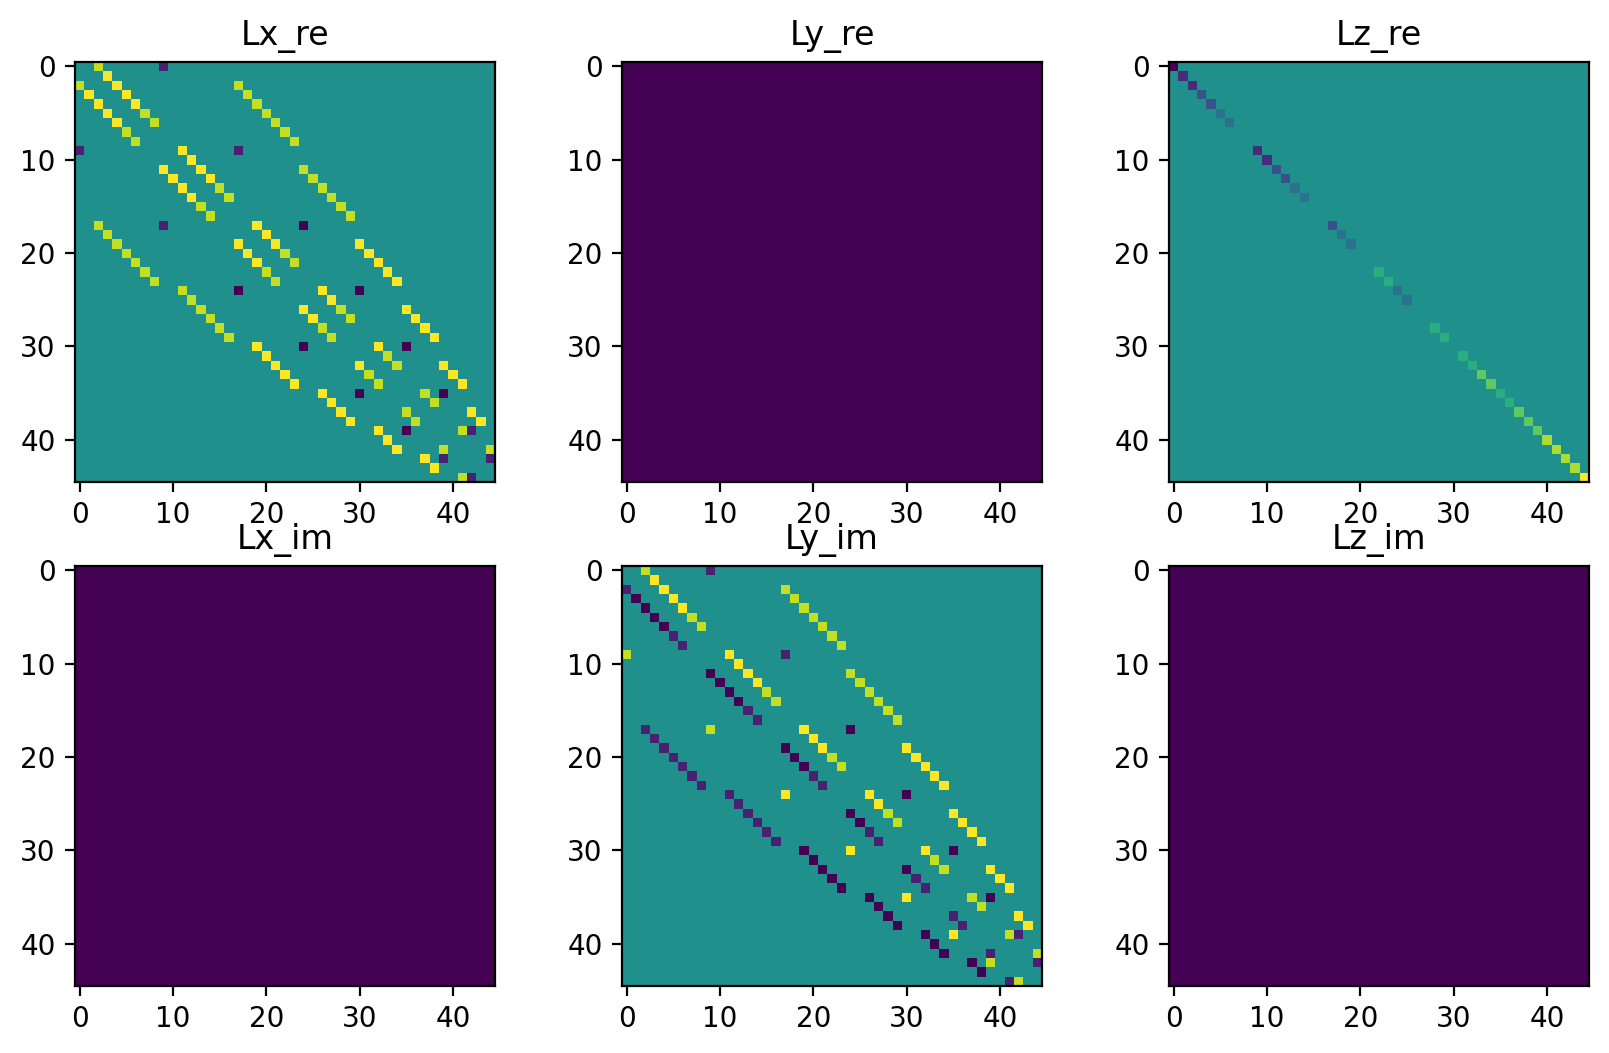

In [79]:
Lx, Ly, Lz = qd.Ltotal(2, 2)
fig, ax = plt.subplots(nrows= 2, ncols=3, figsize=(10,6))

for rowidx in [0,1]:
    nfun = [np.real, np.imag][rowidx]
    nlabel = ['re','im'][rowidx]
    for colidx, (eL, lType) in enumerate(zip([Lx, Ly, Lz],['Lx','Ly','Lz'])):
        plabel = '%s_%s' % (lType, nlabel)
        ax[rowidx, colidx].imshow(nfun(np.array(eL).astype(np.complex64)))
        ax[rowidx, colidx].set_title(plabel)
plt.show()

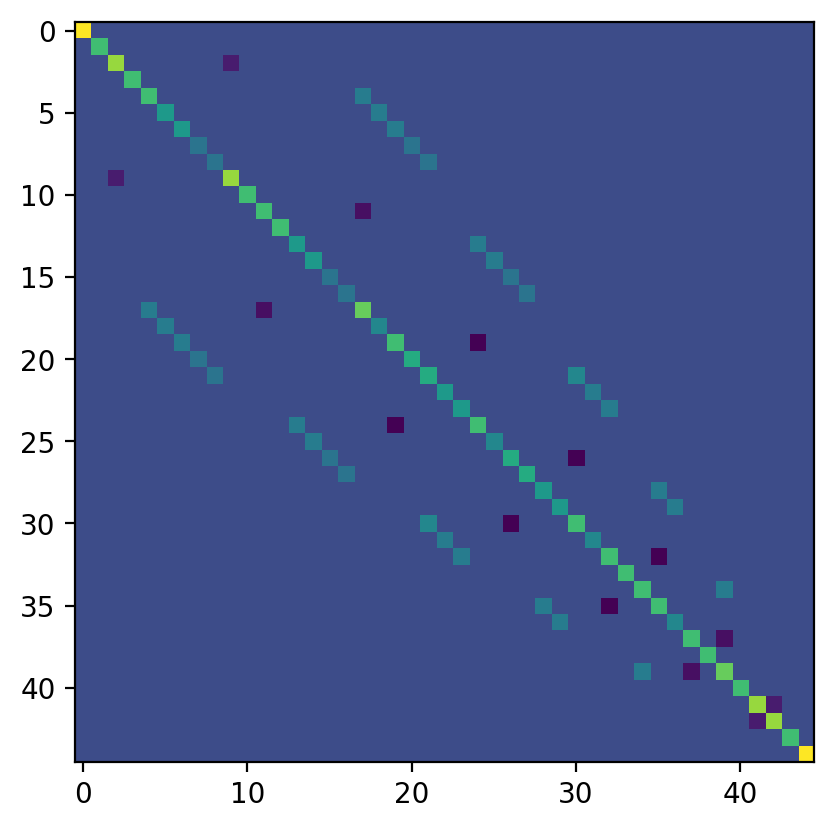

In [80]:
L2 = qd.L_squared(2, 2)
plt.figure()
plt.imshow(np.array(L2).astype(np.float64))
plt.show()

In [81]:
L2.eigenvals()

{20: 9, 12: 21, 6: 5, 2: 9, 0: 1}

## > Multi-Electron matrix elements

## >> single_electron_braket

In [82]:
print(qd.single_electron_braket.__doc__)


    Given  two qets qet0 and qet1 composed of determinantal states, and an
    assumed single particle operator op that is extended by addition to an
    n-particle operator, this function returns the value of the braket
    
      <qet0| \sum_1^N op_i |qet1>

    in terms of brakets of single electron orbitals.

    Spin is assumed to be integrated in the notation for the symbols where
    a  symbol  that  is  adorned with an upper bar is assumed to have spin
    down and one without to have spin up.

    Parameters
    ----------
    qet0       (qdefcore.Qet): a qet
    qet1       (qdefcore.Qet): another qet

    Returns
    -------
    full_braket  (qdefcore.Qet): with each key having three symbols, first
    one  equal  to  a  single  electron  orbital,  second one equal to the
    provided  single electron operator, and the third one equal to another
    single electron orbital. Interpreted as <φi | (op)* | φj>.

    *  The  operator  is omitted and is assumed to be in the middle

As an example lets take the multi equivalent electron basis for four d-electrons. Picke the first to and compute the expression that would sufficient to find the values of a single electron operator (that is understood to have been extended to a multi-electron operator through addition).

In [83]:
qets = qd.elementary_basis('multi equiv electron', 2, 3, as_qets=True)
qet0, qet1 = qets[:2]

In [84]:
display(qet0.as_ket())
display(qet1.as_ket())

|((-2, -1/2), (-2, 1/2), (-1, -1/2))>

|((-2, -1/2), (-2, 1/2), (-1, 1/2))>

In [85]:
sp.Matrix([[qd.single_electron_braket(q0, q1).as_braket() for q1 in [qet0,qet1]] for q0 in [qet0, qet1]])

Matrix([
[<(-2, -1/2)|(-2, -1/2)> + <(-2, 1/2)|(-2, 1/2)> + <(-1, -1/2)|(-1, -1/2)>,                                                  <(-1, -1/2)|(-1, 1/2)>],
[                                                   <(-1, 1/2)|(-1, -1/2)>, <(-2, -1/2)|(-2, -1/2)> + <(-2, 1/2)|(-2, 1/2)> + <(-1, 1/2)|(-1, 1/2)>]])

As such, matrix elements between objects that had three electrons are simplified to sums of matrix elements for the single electron matrix representation.

## >> double_electron_braket

In [86]:
print(qd.double_electron_braket.__doc__)


    Given  two  qets,  which  are  assumed to be composed of determinantal
    states, and a two electron operator op, return value of the braket

      <qet0| \sum_{i>j=1}^N f_i,j |qet1> 
    
    in terms of brakets of double electron orbitals.

    Parameters
    ----------
    qet0    (qdefcore.Qet): a qet of determinantal states
    qet1    (qdefcore.Qet): a qet of determinantal states

    Returns
    -------
    full_braket  (qdefcore.Qet):  with each key having five symbols, first
    two equal to a two electron orbitals, middle one equal to the provided
    double  electron  operator,  and the last two equal to another pair of
    two  single  electron  orbitals;  interpreted as <φi, φj | (op)* | φk,
    φl>. 
    
    *  The  operator  is omitted and is assumed to be in the middle of the
    four symbols.

    References
    ----------
    -   "Multiplets of Transition-Metal Ions in Crystals", Chapter 3
        Sugano, Tanabe, and Kamimura
    


As an example lets take the multi equivalent electron basis for four d-electrons. Picke the first to and compute the expression that would sufficient to find the values of a single electron operator (that is understood to have been extended to a multi-electron operator through addition).

In [87]:
qets = qd.elementary_basis('multi equiv electron', 2, 3, as_qets=True)
qet0, qet1 = qets[:2]

In [88]:
display(qet0.as_ket())
display(qet1.as_ket())

|((-2, -1/2), (-2, 1/2), (-1, -1/2))>

|((-2, -1/2), (-2, 1/2), (-1, 1/2))>

In [89]:
qd.double_electron_braket(qet0, qet1).as_braket()

-<(-1, -1/2)(-2, -1/2)|(-2, -1/2)(-1, 1/2)> + <(-1, -1/2)(-2, -1/2)|(-1, 1/2)(-2, -1/2)> - <(-1, -1/2)(-2, 1/2)|(-2, 1/2)(-1, 1/2)> + <(-1, -1/2)(-2, 1/2)|(-1, 1/2)(-2, 1/2)>

As such, this matrix element that had three electrons is simplified to a sum of matrix elements of two-body matrix elements.

# > Hamiltonians

## >> S^2

In [90]:
print(qd.S_squared.__doc__)


    Provides  the  matrix  representation of the S^2 operator in
    the determinantal uncoupled basis.

    Parameters
    ----------
    num_electrons  : how many electrons.
    l              : orbital angular momentum of electrons.
    sparse         : whether to return a sparse sympy Matrix.

    Returns
    -------
    s2operator (sp.Matrix)

    


In [91]:
# For 3 d-electrons, the total possible spin is 1/2 or 3/2
# 1/2 can be had in two different ways and 3/2 in single one
# As such the spectrum of the operator S^2 should be: 3/4, 15/4
sq = qd.S_squared(3, 3)

In [92]:
sq.eigenvals()

{15/4: 140, 3/4: 224}

## >> ham_CR_CF_SO_TO

In [93]:
print(qd.ham_CR_CF_SO_TO.__doc__)

    
    This  function  provides  the  matrix  representation of a Hamiltonian
    which includes the following interactions:

    - CR: the Coulomb repulsion between electrons (two-body),
    - CF: the crystal field term of the given symmetry (one-body),
    - SO: the spin-orbit interaction (one-body),
    - TO: and   the   Trees effective operator α_T L(L+1) (two-body + one-
    body).

    The  basis  used  is  the  "multi equiv electron" basis as provided by
    qd.elementary_basis, which is a basis composed  of  elementary  Slater
    determinants of the form ((ml1,ms1),(ml2,ms2),...,(mln,msn)).

    The symbols associated with each term are:

    - crystal field: B_{i,j}
    - Coulomb repulsion: F^{(k)}
    - spin-orbit interacion: \zeta_{SO}
    - Trees operator: \alpha_T

    Since  all  these  interactions  aggregate  by  simple  addition,  the
    resulting matrix can be separated according to the  above  symbols  to
    separate the individual interactions.

    The  contri

As an example let's compute the Tanabe-Sugano diagram for a d^2 configuration.

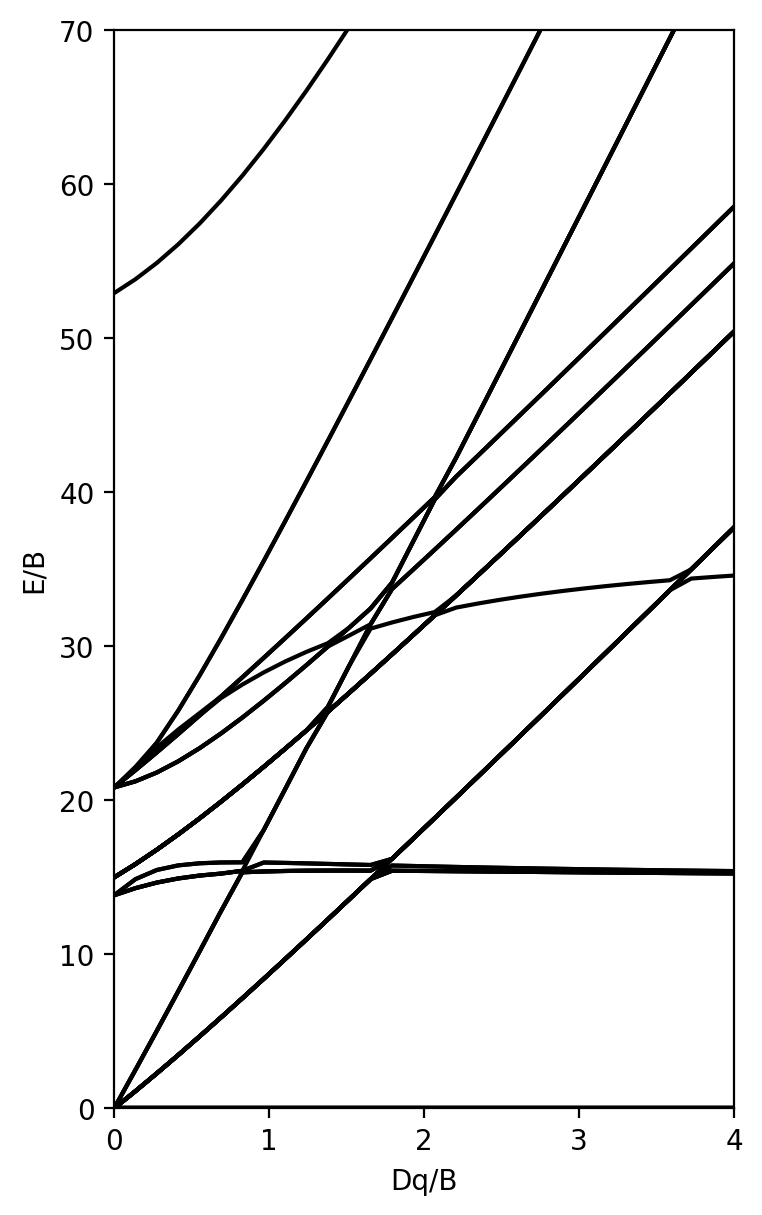

In [94]:
Dq = sp.Symbol('Dq')
Dqs = np.linspace(0,4,30)

hamiltonian = qd.ham_CR_CF_SO_TO(2, 2, 'O')
hamiltonian = hamiltonian.subs({sp.Symbol('\zeta_{SO}'): 0, 
                                sp.Symbol('\\alpha_T') : 0
                                })
hamiltonian = hamiltonian.subs(qd.SLATER_TO_RACAH)
hamiltonian = hamiltonian.subs({sp.Symbol('A'):0,
                                sp.Symbol('B_{4,0}'):21*Dq,
                                sp.Symbol('B'):1,
                                sp.Symbol('C'):sp.Symbol('\gamma_{CB}')})
# for V3+
hamiltonian = hamiltonian.subs({sp.Symbol('\gamma_{CB}'): 4.42})
energies = []
for Dqval in Dqs:
    num_ham = hamiltonian.subs({Dq: Dqval})
    ham_energies = np.linalg.eigvals(np.array(num_ham).astype(np.float64))
    ham_energies = np.real(ham_energies)
    ham_energies = np.sort(ham_energies)
    ham_energies = ham_energies - ham_energies[0]
    energies.append(ham_energies)
energies = np.array(energies)
energies = energies.T

# For comparison see TSK Fig 5.1
plt.figure(figsize=(4,7))
for row in energies:
    plt.plot(Dqs, row,'k',ms=1)
plt.ylim(0,70)
plt.xlim(0,4)
plt.xlabel('Dq/B')
plt.ylabel('E/B')
plt.show()

<center> <img src="notebook_imgs/2022-09-04-15-22-59.png" style="width: 75%;"/> </center>

And for a d^3 configuration.

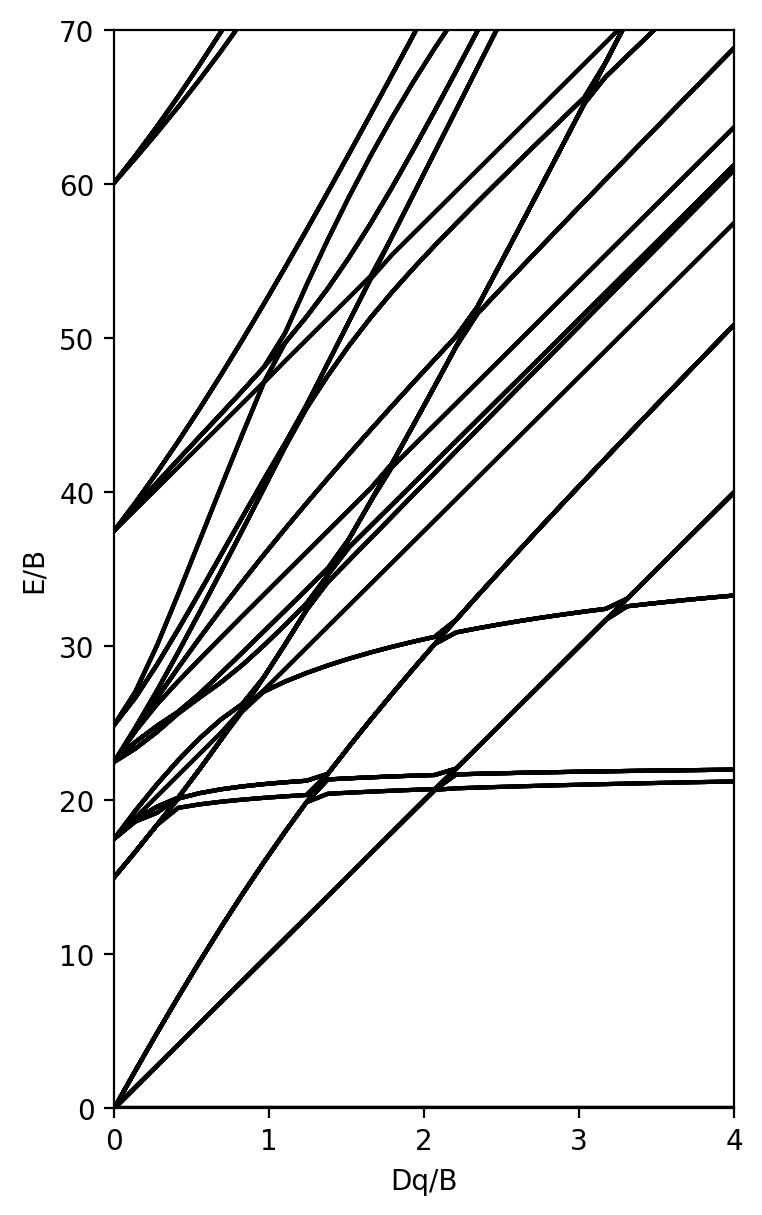

In [95]:
Dq = sp.Symbol('Dq')
Dqs = np.linspace(0,4,30)

hamiltonian = qd.ham_CR_CF_SO_TO(3, 2, 'O')
hamiltonian = hamiltonian.subs({sp.Symbol('\zeta_{SO}'): 0, 
                                sp.Symbol('\\alpha_T') : 0
                                })
hamiltonian = hamiltonian.subs(qd.SLATER_TO_RACAH)
hamiltonian = hamiltonian.subs({sp.Symbol('A'):0,
                                sp.Symbol('B_{4,0}'):21*Dq,
                                sp.Symbol('B'):1,
                                sp.Symbol('C'):sp.Symbol('\gamma_{CB}')})
# for Cr3+
hamiltonian = hamiltonian.subs({sp.Symbol('\gamma_{CB}'): 4.5})
energies = []
for Dqval in Dqs:
    num_ham = hamiltonian.subs({Dq: Dqval})
    ham_energies = np.linalg.eigvals(np.array(num_ham).astype(np.float64))
    ham_energies = np.real(ham_energies)
    ham_energies = np.sort(ham_energies)
    ham_energies = ham_energies - ham_energies[0]
    energies.append(ham_energies)
energies = np.array(energies)
energies = energies.T

# For comparison see TSK Fig 5.3
plt.figure(figsize=(4,7))
for row in energies:
    plt.plot(Dqs, row,'k',ms=1)
plt.ylim(0,70)
plt.xlim(0,4)
plt.xlabel('Dq/B')
plt.ylabel('E/B')
plt.show()

<center> <img src="notebook_imgs/2022-09-04-11-58-28.png" style="width: 75%;"/> </center>

# > Optical Operators

## >> Magnetic Dipole Operator

In [96]:
print(qd.standard_mag_dip.__doc__)


    Magnetic dipole operator matrix elements.

    Compute  the  matrix  elements  of the magnetic dipole operator in the
    standard basis for a system with the given number of electrons.

        μ = -\mu_B * (L + g_s S)

    Parameters
    ----------
    num_electrons (int) :
    l             (l)   :

    Returns
    -------
    mag_dip_matrices, mag_dip_operators (tuple) with
        mag_dip_matrices  (OrderedDict): with keys 'x', 'y', 'z' and
        values  sp.Matrix 
        mag_dip_operators (OrderedDict): with keys
        'x',  'y',  'z' and values OrderedDict whose keys are tuples
        with as many SpinOrbital as num_electrons there are.
    
    


In [97]:
mdip = qd.standard_mag_dip(2, qd.HALF)

In [98]:
for k, v in mdip[0].items():
    print(k)
    display(v)

x


Matrix([
[     0,    0, -g_s/2, g_s/2,    0,      0],
[     0,    0,   -1/2,  -1/2,    0,      0],
[-g_s/2, -1/2,      0,     0, -1/2, -g_s/2],
[ g_s/2, -1/2,      0,     0, -1/2,  g_s/2],
[     0,    0,   -1/2,  -1/2,    0,      0],
[     0,    0, -g_s/2, g_s/2,    0,      0]])

y


Matrix([
[       0,   0, -I*g_s/2,  I*g_s/2,    0,        0],
[       0,   0,     -I/2,     -I/2,    0,        0],
[ I*g_s/2, I/2,        0,        0, -I/2, -I*g_s/2],
[-I*g_s/2, I/2,        0,        0, -I/2,  I*g_s/2],
[       0,   0,      I/2,      I/2,    0,        0],
[       0,   0,  I*g_s/2, -I*g_s/2,    0,        0]])

z


Matrix([
[g_s, 0, 0, 0,  0,    0],
[  0, 1, 0, 0,  0,    0],
[  0, 0, 0, 0,  0,    0],
[  0, 0, 0, 0,  0,    0],
[  0, 0, 0, 0, -1,    0],
[  0, 0, 0, 0,  0, -g_s]])

In [99]:
list(mdip[1]['x'].keys())[0][0][0].orbital

(1/2, -1/2)